**THIS IS DATA ANALYSIS OF YOUTUBE TRENDING SECTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import datetime as dt
from glob import glob

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


We have a Json file and a csv for individual country. We will parse dataframes from csvs and JSONs will be used for mapping of "Category" column in dataframes. 
We would be using "video_id" for index as it is unique for every video.

In [2]:
#Creating list of filenames
csv_files = glob('*.csv')
json_files = glob('*.json')

#Loading files into variables
df_list = list(map(lambda z: pd.read_csv(z,index_col='video_id'),
                                                             csv_files))
britain_js, germany_js, canada_js, france_js, usa_js = list(map(lambda a: json.load(open(a,'r')), 
                                                                            json_files))

We will look into head and info of any one dataframe(Britain) and plan our data cleaning process according to that.
As we look into the head of dataframe, 'description', 'tags' and 'thumbnail_link' dosen't seem to be relevant for our analysis, so we should drop them.

In [3]:
df_list[4].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [4]:
df_list[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 40949 entries, 2kyS6SvSYSE to ooyjaVdt-jA
Data columns (total 15 columns):
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(7)
memory usage: 4.2+ MB


As 'description', 'tags' and 'thumbnail_link' are not necessary for our analysis we can drop them

In [5]:
def column_dropper(df):
    new_df = df.drop(columns=['description', 'tags', 'thumbnail_link'])
    return new_df

df_list2 = list(map(column_dropper, df_list)) 
df_list[0].head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


JSON file included with dataset would be used to make "category" column.
First we have to make a dictionary with key and value pair of "category_id" and "category".
Then we map this dictionary on the dataframe, droppping 'category_id' at the end because that column is no more useful

In [6]:
def category_dict_maker(js):
    items = js['items']
    item_id = []
    item_snippet_title = []
    for item in items:
        item_id.append(item['id']) 
        item_snippet_title.append(str(item['snippet']['title']))
    item_dict = dict(zip(item_id, item_snippet_title))
    return(item_dict)

brit_dict = category_dict_maker(britain_js)

def category_maker(value):
    for key in brit_dict:
        if str(value) == key:
            return (brit_dict[key])
        else:
            continue

def cat_applier(df):
    df['category'] = df.category_id.apply(func=category_maker)
    df.category = df.category.astype('category')
    return df.drop(columns=['category_id'])

df_list3 = list(map(cat_applier, df_list2))    
df_list3[0].head()


,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
video_id,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,People & Blogs
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,Entertainment
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,Comedy
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Entertainment
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,Entertainment


We will change dates('trending_date' and 'publish_time') to datetime format.
Dataset of France has an invalid month number(41) so we would just "coerce" the errors for now

In [7]:
def string_convertor(string):
    yy=string[0:2]
    dd=string[3:5]
    mm=string[6:8]
    new_string = str("20"+yy+"-"+mm+"-"+dd)
    return new_string

def datetime_setter(df):
    df.trending_date = pd.to_datetime(df.trending_date.apply(string_convertor), errors='coerce')
    df.publish_time = pd.to_datetime(df.publish_time, errors='coerce')
    return df

df_list4 = list(map(datetime_setter, df_list3)) 
df_list4[0].head()

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category
video_id,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,People & Blogs
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,Entertainment
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,Comedy
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,Entertainment
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,Entertainment


As cleaning is complete for now, we can unpack the list into tuples

In [8]:
france, britain, canada, usa, germany = df_list4

We will calculate the difference between the publish time and trending date and find the one with minimum differrence, to see which video featured in trending section with least time.
**We can see two outliers (-1 day and 3657 days).**
-1 could be perfectly resonable here, due to time zones differences.

In [9]:
britain['trending_delta'] = britain.trending_date - britain.publish_time
min_time = np.min(britain['trending_delta'])
max_time = np.max(britain['trending_delta'])


print("Fastest to trending:") 
print(britain[['title','trending_delta']].loc[britain['trending_delta']==min_time])
print("\nSlowest to trending:") ,
print(britain[['title','trending_delta']].loc[britain['trending_delta']==max_time],'\n')

print("Mean trending delta:", np.mean(britain['trending_delta']))
print("Median trending delta:", np.median(britain['trending_delta']))


Fastest to trending:
                                                         title  \
video_id                                                         
ZHqDZDQ8_-E  4 heftige Film-Fehler/ Serien-Fehler | Jay & Arya   

               trending_delta  
video_id                       
ZHqDZDQ8_-E -1 days +06:09:06  

Slowest to trending:
                                                         title  \
video_id                                                         
FXA937WRDk0  Kriminelle Großfamilien in Berlin - Interview ...   

                trending_delta  
video_id                        
FXA937WRDk0 2045 days 13:01:45   

Mean trending delta: 1 days 05:41:36.972575
Median trending delta: 46797000000000 nanoseconds


Comparing British to Canadian, we see completely different plots. Seems like Canadians watch more Music videos compared to British.
From the countplot of category from British dataframe we can conclude that Entertainment videos have great views to like ratio

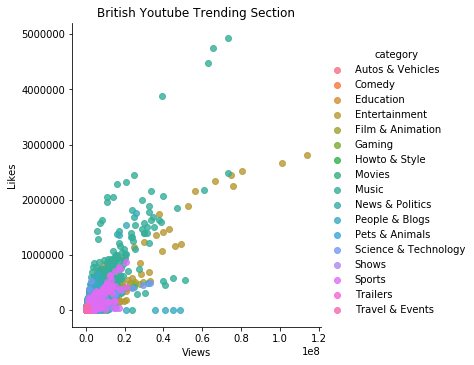

In [10]:
sns.lmplot('views', 'likes', data=britain, hue='category', fit_reg=False);
plt.title('British Youtube Trending Section')
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

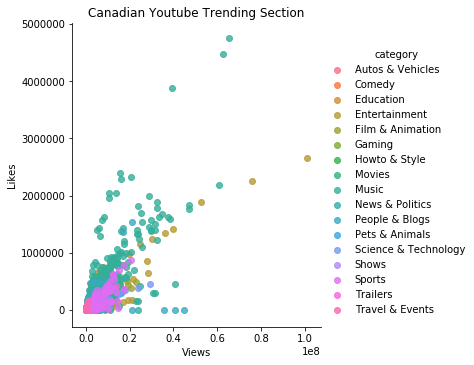

In [11]:
sns.lmplot('views', 'likes', data=canada, hue='category', fit_reg=False);
plt.title('Canadian Youtube Trending Section')
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

From the both category count plots we can conclude Entertainment videos have higher count for every country.
Also, this count plot below, confirms our hypothesis that Candians watch more Music videos than British.

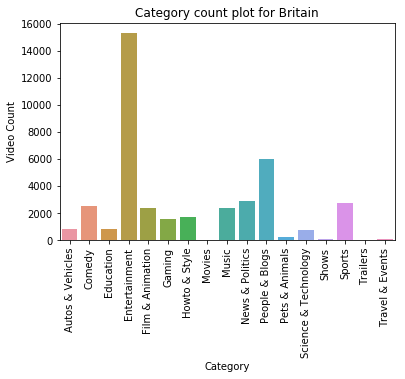

In [12]:
sns.countplot('category', data=britain)
plt.title('Category count plot for Britain')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=90)
plt.show()

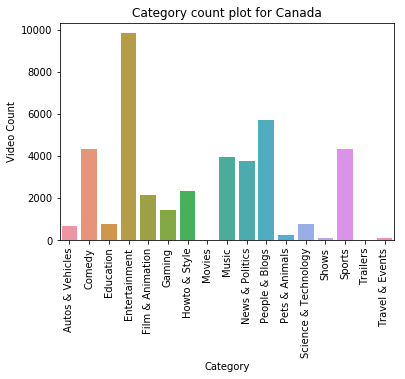

In [13]:
sns.countplot('category', data=canada)
plt.title('Category count plot for Canada')
plt.xlabel('Category')
plt.ylabel('Video Count')
plt.xticks(rotation=90)
plt.show()

Hey, this is my first ipynotebook, I would like some contstructive criticism on this 